# 5 Binary Typologies
# NYU - CUSP UDP Capstone
## Brief
This notebook 
1. Part I. Data Processing
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - map topologies
    - outputs a .csv of the results
    - You can refer to https://github.com/mv1742/updny_2

###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [1]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Census Tract shapefile
- imports the Census Tract shapefile


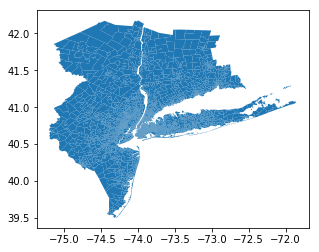

In [2]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()

In [3]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [4]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

# Typologies
- import Typologies
- merges topologies
- map topologies

In [5]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiespd.shape

(5298, 82)

In [6]:
# sfig = pd.plotting.scatter_matrix(Typologiesgdp, s=30, figsize=(10, 10), diagonal='kde')

In [7]:
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
Typologiesgdp['Type_1.19'].unique()

array(['VHI - Super Gentrification or Exclusion',
       'MHI - Ongoing Exclusion',
       'MHI - Stable or Early Stage of Exclusion',
       'MHI - Advanced Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'LI - Not Losing Low-Income Households',
       'LI - Ongoing Displacement of Low-Income Households',
       'Missing Data', 'LI - Ongoing Gentrification', nan], dtype=object)

In [8]:
Typologiesgdp['Ongoing_adv_gent'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['Ongoing_adv_gent'].replace('VHI - Super Gentrification or Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Ongoing Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Stable or Early Stage of Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Exclusion', 0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - At Risk of Gentrification',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Not Losing Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Displacement of Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('Missing Data',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace(nan,0,inplace=True)


In [9]:
Typologiesgdp.Ongoing_adv_gent.sum()

645.0

In [10]:
Typologiesgdp.columns

Index(['geoid', 'typology_old', 'medrent90', 'medrent00', 'medrent16',
       'medhval90', 'medhval00', 'medhval16', 'percol90', 'percol00',
       'percol16', 'pernwh90', 'pernwh00', 'pernwh16', 'perli90', 'perli00',
       'perli16', 'per_rent_90', 'per_rent_00', 'per_rent16', 'pop00', 'pop16',
       'asian_16_low', 'carcommuters_00', 'pre50_16', 'hhwch16', 'empd15',
       'density16', 'aland', 'li16', 'afford90', 'belowmedcol90',
       'abovemednwh', 'abovemedli', 'abovemedrent', 'vulnrisk90', 'vuln90',
       'afford00', 'belowmedcol00', 'abovemednwh00', 'abovemedli00',
       'abovemedrent00', 'vulnrisk00', 'vuln00', 'afford16', 'belowmedcol16',
       'abovemednwh16', 'abovemedli16', 'abovemedrent16', 'vulnrisk16',
       'vuln16', 'hotmarket90(127%-169%)', 'hotmarket00(110%-207%)',
       'percol16.1', 'edudiff0016', 'abm_dif_0016', 'edudiff9000',
       'abm_dif_9000', 'hinc90_NYU', 'hinc00_NYU', 'hinc16_NYU', 'hinc90',
       'hinc00', 'hinc16', 'pct_ch_hinc90_00', 'pct_ch_

In [11]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)

In [12]:
Typologiesgdp['High_low'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['High_low'].replace('VHI - Super Gentrification or Exclusion','H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Ongoing Exclusion','H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Stable or Early Stage of Exclusion','H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Advanced Exclusion', 'H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Advanced Gentrification','H',inplace=True)
Typologiesgdp['High_low'].replace('LI - At Risk of Gentrification','L',inplace=True)
Typologiesgdp['High_low'].replace('LI - Ongoing Gentrification','L',inplace=True)
Typologiesgdp['High_low'].replace('LI - Not Losing Low-Income Households','L',inplace=True)
Typologiesgdp['High_low'].replace('LI - Ongoing Displacement of Low-Income Households','L',inplace=True)
Typologiesgdp['High_low'].replace('Missing Data',0,inplace=True)
Typologiesgdp['High_low'].replace(nan,0,inplace=True)

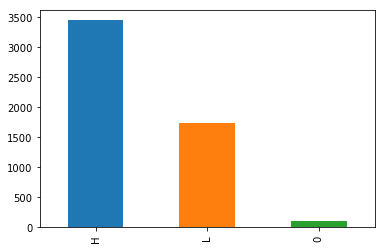

In [13]:
Typologiesgdp['High_low'].value_counts().plot(kind='bar')

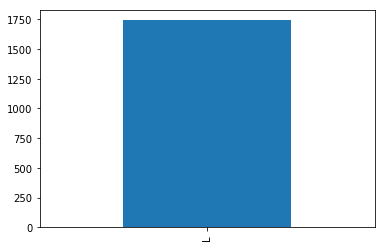

In [14]:
Typologiesgdp['High_low'][Typologiesgdp['High_low'] == 'L'].value_counts().plot(kind='bar')

# Karen's Typologies

In [15]:
Typvariant=pd.read_csv('./Data/NY gentrification dependent variables.csv')
print(Typvariant.shape)
Typvariant = gpd.GeoDataFrame(Typvariant)
len(Typvariant.columns), Typvariant.shape
# Typologiesgdp.drop(columns=['Type_1.19'], inplace=True)
Typvariant.head()
print(Typvariant.columns)
Typvariant.rename(columns={'geoid':'GEOID'},inplace=True)
Typologiesgdp = Typologiesgdp.drop(columns = ['gent00_16', 'gent90_00']).merge(Typvariant, on= 'GEOID')
print(Typvariant.isnull().sum())
Typvariant.GEOID.unique(), len(Typvariant.GEOID.unique())

(5294, 4)
Index(['geoid', 'gent90_00', 'gent00_16', 'Supergent16'], dtype='object')
GEOID            0
gent90_00       75
gent00_16       75
Supergent16    102
dtype: int64


(array([ 9001010102,  9001010201,  9001010202, ..., 36103190704,
        36111951600, 34035053801]), 5294)

In [16]:
Typvariant.GEOID[Typvariant.GEOID > 1.001010e+10].describe()

count    4.848000e+03
mean     3.541423e+10
std      9.528233e+08
min      3.400300e+10
25%      3.403112e+10
50%      3.604705e+10
75%      3.608104e+10
max      3.611998e+10
Name: GEOID, dtype: float64

In [17]:
Typvariant.GEOID[Typvariant.GEOID < 1.001010e+10].describe()

count    4.460000e+02
mean     9.004979e+09
std      3.826867e+06
min      9.001010e+09
25%      9.001072e+09
50%      9.005279e+09
75%      9.009166e+09
max      9.009362e+09
Name: GEOID, dtype: float64

In [18]:
# Typologiesgdp

324.0
394.0
170.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


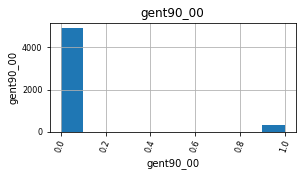

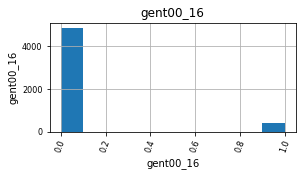

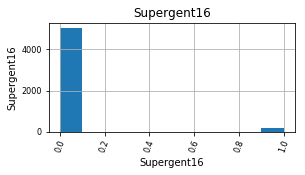

In [19]:
for i,H in enumerate(Typvariant.columns):
    if H == 'GEOID':
        continue
    fig = pl.figure(figsize=(15,2))
    pl.subplot(1,3,i)
    pl.title(H)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel(H)
    pl.ylabel(H)
    plt.xticks(rotation=70)
    Typvariant[H].hist()
    print(Typvariant[H].sum())
    #ax.plot(schoolsq2[A], schoolsq2[P], label="start")
    plt.subplots_adjust(hspace=0.5)
    pl.legend()

# NEW BINARY TYPOLOGIES

In [20]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','High_low','medrent00','medrent16',
            'medhval00','medhval16','hinc00','hinc16','percol00','percol16','pct_ch_hinc00_16',
           'gent00_16', 'gent90_00','Supergent16','Ongoing_adv_gent']
print(type(Typologiesgdp.iloc[:,0][0]))
Typ_Bin = Typologiesgdp.loc[:,cols_typ].copy()
Typ_Bin.head()

<class 'numpy.float64'>


,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent
0,9.001010e+09,H,1601.0,1510.0,1000001.0,1494000.0,273976.05,150655.0,0.354071,0.619597,-0.450116,0.0,0.0,1.0,0.0
1,9.001010e+09,H,1244.0,1628.0,1000000.0,2000000.0,290000.00,250000.0,0.748477,0.784978,-0.137931,0.0,0.0,0.0,0.0
2,9.001010e+09,H,833.0,2113.0,1000000.0,2000000.0,290000.00,212448.0,0.704225,0.761389,-0.267421,0.0,0.0,0.0,0.0
3,9.001010e+09,H,1791.0,2250.0,769300.0,1459900.0,157543.95,187875.0,0.342164,0.662879,0.192524,0.0,0.0,0.0,0.0
4,9.001010e+09,H,1967.0,1900.0,1000001.0,2000001.0,246540.60,221250.0,0.357744,0.805446,-0.102582,0.0,0.0,0.0,0.0


In [21]:
# # Typ_Bin
# sfig = pd.scatter_matrix(Typ_Bin, s=30, figsize=(10, 10), diagonal='kde')

In [22]:
Typ_Bin.percol00.describe(), Typ_Bin.percol16.describe()


(count    5290.000000
 mean        0.194462
 std         0.137087
 min         0.000000
 25%         0.097075
 50%         0.163948
 75%         0.253707
 max         1.000000
 Name: percol00, dtype: float64, count    5247.000000
 mean        0.366844
 std         0.201819
 min         0.000000
 25%         0.210793
 50%         0.331415
 75%         0.493451
 max         1.000000
 Name: percol16, dtype: float64)

In [23]:
# FIX medval16!
Typ_Bin.medhval00.describe(), Typ_Bin.medhval16.describe()


(count    5.218000e+03
 mean     2.198662e+05
 std      1.272452e+05
 min      0.000000e+00
 25%      1.496250e+05
 50%      1.928000e+05
 75%      2.538000e+05
 max      1.000001e+06
 Name: medhval00, dtype: float64, count    5.093000e+03
 mean     4.552332e+05
 std      2.713171e+05
 min      0.000000e+00
 25%      2.886000e+05
 50%      4.000000e+05
 75%      5.608000e+05
 max      2.000001e+06
 Name: medhval16, dtype: float64)

In [24]:
tempmerged = NYCzip.merge(Typ_Bin,on='GEOID')
list(tempmerged.columns)
print(type(tempmerged),tempmerged.shape)
tempmergedgpd = gpd.GeoDataFrame(tempmerged)
tempmergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5290, 16)


(5290, 16)

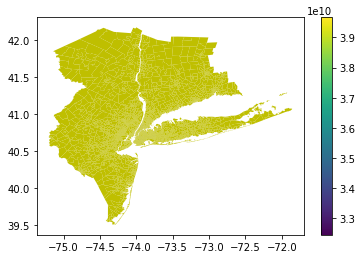

In [25]:
figure, ax = plt.subplots()
tempmergedgpd.plot(color="y",legend = True, ax=ax)
# tempmergedgpd.plot(color="w", edgecolor="k",legend = True, ax=ax)
tempmergedgpd[tempmergedgpd.GEOID==36061025100].plot(column='GEOID',legend = True, ax=ax)

In [26]:

a = Typ_Bin.percol00
b = Typ_Bin.percol16
a_unique = Typ_Bin.medhval00.unique()
b_unique = Typ_Bin.medhval16.unique()

np.sort(a)[:60], np.sort(b)[:15],np.sort(a_unique), np.sort(b_unique)

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00526547,
         0.00574438,  0.00650054,  0.00767414,  0.00866956,  0.00884173]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00327011,  0

In [27]:
# sorted is for lists not numpy arrays!!!!!!!!!!!!!!!!!
# sorted(Typ_Bin.medhval00.unique())[:5], sorted(Typ_Bin.medhval16.unique())[:5]

a = Typ_Bin.medhval00
b = Typ_Bin.medhval16

np.sort(a)[:20], np.sort(b)[:85]

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9999.,  9999.,  9999.]),
 array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.

In [28]:
a = Typ_Bin.medhval00.unique()
b = Typ_Bin.medhval16.unique()

np.sort(a), np.sort(b)

(array([       0.   ,     9999.   ,    10000.   , ...,  1000000.058,
         1000001.   ,          nan]),
 array([       0.,    23100.,    24900., ...,  2000000.,  2000001.,
              nan]))

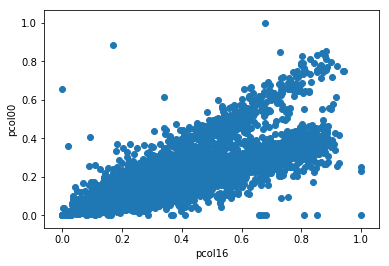

In [29]:
plt.scatter(Typ_Bin.percol16, Typ_Bin.percol00)
plt.xlabel('pcol16')
plt.ylabel('pcol00')

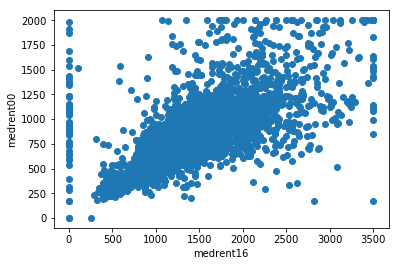

In [30]:
plt.scatter(Typ_Bin.medrent16, Typ_Bin.medrent00)
plt.xlabel('medrent16')
plt.ylabel('medrent00')

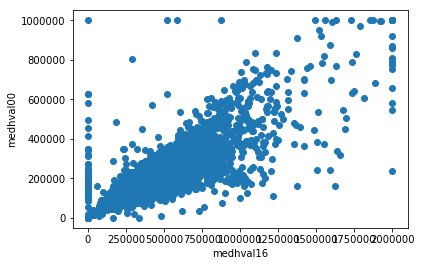

In [31]:
plt.scatter(Typ_Bin.medhval16, Typ_Bin.medhval00)
plt.xlabel('medhval16')
plt.ylabel('medhval00')

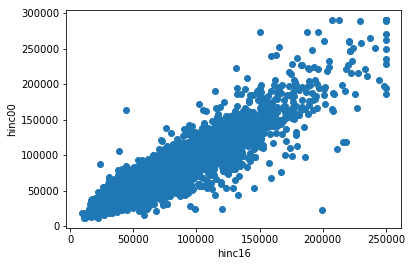

In [32]:
plt.scatter(Typ_Bin.hinc16, Typ_Bin.hinc00)
plt.xlabel('hinc16')
plt.ylabel('hinc00')

In [33]:
print(Typ_Bin.percol16.isnull().sum())
print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.percol00.isnull().sum())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medhval00.isnull().sum())
total1 = (Typ_Bin.percol16.isnull().sum()+Typ_Bin.medrent16.isnull().sum())+\
    (Typ_Bin.medhval16.isnull().sum())+(Typ_Bin.medrent00.isnull().sum())+(Typ_Bin.medhval00.isnull().sum()+\
                                                                          Typ_Bin.percol00.isnull().sum())
total1

47
160
201
4
57
76


545

In [34]:
Typ_Bin.pct_ch_hinc00_16= Typ_Bin.pct_ch_hinc00_16.replace(0,nan)
Typ_Bin.percol00= Typ_Bin.percol00.replace(0,nan)
Typ_Bin.percol16= Typ_Bin.percol16.replace(0,nan)

Typ_Bin.medhval00= Typ_Bin.medhval00.replace(0,nan)
Typ_Bin.medhval16= Typ_Bin.medhval16.replace(0,nan)
Typ_Bin.medrent00= Typ_Bin.medrent00.replace(0,nan)
Typ_Bin.medrent16= Typ_Bin.medrent16.replace(0,nan)


print(Typ_Bin.percol16.isnull().sum())
print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.percol00.isnull().sum())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medhval00.isnull().sum())
total2 = (Typ_Bin.percol16.isnull().sum()+Typ_Bin.medrent16.isnull().sum())+\
    (Typ_Bin.medhval16.isnull().sum())+(Typ_Bin.medrent00.isnull().sum())+(Typ_Bin.medhval00.isnull().sum()+\
                                                                          Typ_Bin.percol00.isnull().sum())
total2, total2-total1

54
232
282
58
60
93


(779, 234)

In [35]:
# Typ_Bin.pct_ch_hinc00_16= Typ_Bin.pct_ch_hinc00_16.replace(nan,Typ_Bin.pct_ch_hinc00_16.mean())
# Typ_Bin.medhval00= Typ_Bin.medhval00.replace(nan,Typ_Bin.medhval00.mean())
# Typ_Bin.medhval16= Typ_Bin.medhval16.replace(nan,Typ_Bin.medhval16.mean())
# Typ_Bin.medrent00= Typ_Bin.medrent00.replace(nan,Typ_Bin.medrent00.mean())
# Typ_Bin.medrent16= Typ_Bin.medrent16.replace(nan,Typ_Bin.medrent16.mean())

print(Typ_Bin.percol16.isnull().sum())
print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.percol00.isnull().sum())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medhval00.isnull().sum())
total3 = (Typ_Bin.percol16.isnull().sum()+Typ_Bin.medrent16.isnull().sum())+\
    (Typ_Bin.medhval16.isnull().sum())+(Typ_Bin.medrent00.isnull().sum())+(Typ_Bin.medhval00.isnull().sum()+\
                                                                          Typ_Bin.percol00.isnull().sum())
total3, total3- total2


54
232
282
58
60
93


(779, 0)

In [36]:
# CREATE
Typ_Bin['pct_ch_percol00_16'] = (Typ_Bin.percol16-Typ_Bin.percol00)/Typ_Bin.percol00
Typ_Bin['pct_ch_medhval00_16'] = (Typ_Bin.medhval16-Typ_Bin.medhval00)/Typ_Bin.medhval00
Typ_Bin['pct_ch_medrent00_16'] = (Typ_Bin.medrent16-Typ_Bin.medrent00)/Typ_Bin.medrent00
Typ_Bin['pct_ch_hinc00_16_TEST'] = (Typ_Bin.hinc16-Typ_Bin.hinc00)/Typ_Bin.hinc00

In [37]:
Typ_Bin.pct_ch_hinc00_16_TEST.describe()

count    5203.000000
mean       -0.011197
std         0.271619
min        -0.731712
25%        -0.153543
50%        -0.050019
75%         0.078466
max         7.613316
Name: pct_ch_hinc00_16_TEST, dtype: float64

In [38]:
Typ_Bin.pct_ch_hinc00_16.describe()

count    5178.000000
mean       -0.012756
std         0.249594
min        -0.728638
25%        -0.153405
50%        -0.050087
75%         0.078159
max         3.980326
Name: pct_ch_hinc00_16, dtype: float64

In [39]:
Typ_Bin.pct_ch_medhval00_16.describe(), Typ_Bin.pct_ch_medrent00_16.describe(), Typ_Bin.pct_ch_percol00_16.describe()

(count    4997.000000
 mean        1.158986
 std         1.076018
 min        -0.647572
 25%         0.752347
 50%         0.959695
 75%         1.327322
 max        47.134813
 Name: pct_ch_medhval00_16, dtype: float64, count    5055.000000
 mean        0.758778
 std         0.545028
 min        -0.934783
 25%         0.524811
 50%         0.703571
 75%         0.895084
 max        19.000000
 Name: pct_ch_medrent00_16, dtype: float64, count    5219.000000
 mean        1.207427
 std         1.229411
 min        -0.944937
 25%         0.565233
 50%         1.028110
 75%         1.491479
 max        24.979950
 Name: pct_ch_percol00_16, dtype: float64)

In [40]:
# CLEAN
# ALL TO SAME SIZE
Typ_Bin.isnull().sum().sum(),Typ_Bin.isnull().sum()

(1987, GEOID                      0
 High_low                   0
 medrent00                 60
 medrent16                232
 medhval00                 93
 medhval16                282
 hinc00                    51
 hinc16                    87
 percol00                  58
 percol16                  54
 pct_ch_hinc00_16         116
 gent00_16                 75
 gent90_00                 75
 Supergent16              102
 Ongoing_adv_gent           0
 pct_ch_percol00_16        75
 pct_ch_medhval00_16      297
 pct_ch_medrent00_16      239
 pct_ch_hinc00_16_TEST     91
 dtype: int64)

In [41]:
print(Typ_Bin.shape)
Typ_Bin =Typ_Bin.dropna(how='all',axis=0)
print(Typ_Bin.shape)
Typ_Bin = Typ_Bin.dropna(axis=0)
print(Typ_Bin.shape)
cols_X = [i for i in Typ_Bin.columns] #if (i != 'pct_ch_hinc00_16')&(i != 'GEOID')]
print(cols_X)

(5294, 19)
(5294, 19)
(4829, 19)
['GEOID', 'High_low', 'medrent00', 'medrent16', 'medhval00', 'medhval16', 'hinc00', 'hinc16', 'percol00', 'percol16', 'pct_ch_hinc00_16', 'gent00_16', 'gent90_00', 'Supergent16', 'Ongoing_adv_gent', 'pct_ch_percol00_16', 'pct_ch_medhval00_16', 'pct_ch_medrent00_16', 'pct_ch_hinc00_16_TEST']


In [42]:
Typ_Bin.isnull().sum()

GEOID                    0
High_low                 0
medrent00                0
medrent16                0
medhval00                0
medhval16                0
hinc00                   0
hinc16                   0
percol00                 0
percol16                 0
pct_ch_hinc00_16         0
gent00_16                0
gent90_00                0
Supergent16              0
Ongoing_adv_gent         0
pct_ch_percol00_16       0
pct_ch_medhval00_16      0
pct_ch_medrent00_16      0
pct_ch_hinc00_16_TEST    0
dtype: int64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


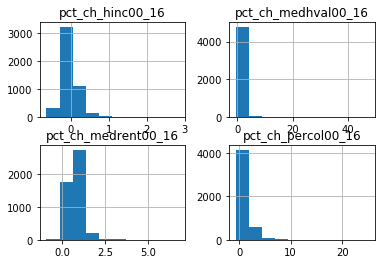

In [43]:
# Explore 
newTyps_values = ['pct_ch_percol00_16','pct_ch_medhval00_16','pct_ch_medrent00_16','pct_ch_hinc00_16']

Typ_Bin.loc[:,newTyps_values]
plt.figure(1)
Typ_Bin.loc[:,newTyps_values].hist(ax=plt.gca(), figsize = (20,5))
plt.show()

In [44]:
print(Typ_Bin.pct_ch_percol00_16.isnull().sum())
print(Typ_Bin.pct_ch_percol00_16.describe())
print(Typ_Bin.pct_ch_medhval00_16.isnull().sum())
print(Typ_Bin.pct_ch_medhval00_16.describe())
print(Typ_Bin.pct_ch_medrent00_16.isnull().sum())
print(Typ_Bin.pct_ch_medrent00_16.describe())
print(Typ_Bin.pct_ch_hinc00_16.isnull().sum())
print(Typ_Bin.pct_ch_hinc00_16.describe())

0
count    4829.000000
mean        1.184850
std         1.177483
min        -0.707061
25%         0.563905
50%         1.020412
75%         1.470244
max        24.979950
Name: pct_ch_percol00_16, dtype: float64
0
count    4829.000000
mean        1.168527
std         1.090358
min        -0.647572
25%         0.755299
50%         0.968215
75%         1.341555
max        47.134813
Name: pct_ch_medhval00_16, dtype: float64
0
count    4829.000000
mean        0.743004
std         0.418239
min        -0.934783
25%         0.521942
50%         0.696523
75%         0.889692
max         6.789965
Name: pct_ch_medrent00_16, dtype: float64
0
count    4829.000000
mean       -0.017278
std         0.231754
min        -0.635845
25%        -0.154222
50%        -0.052021
75%         0.073200
max         2.838292
Name: pct_ch_hinc00_16, dtype: float64


In [45]:
# Filter Low Incomes
Typ_Bin.head(1)

,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_hinc00_16_TEST
0,9.001010e+09,H,1601.0,1510.0,1000001.0,1494000.0,273976.05,150655.0,0.354071,0.619597,-0.450116,0.0,0.0,1.0,0.0,0.749923,0.493999,-0.056839,-0.450116


# For all incomes

(4829, 19)


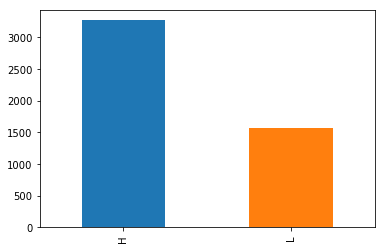

In [46]:
newTyps_values

Typ_ALL_Incomes = Typ_Bin.copy()
print(Typ_ALL_Incomes.shape)
Typ_ALL_Incomes.tail()
Typ_ALL_Incomes['High_low'].value_counts().plot(kind='bar')

In [47]:
newTyps_raw = []
for string in newTyps_values:
    newTyps_raw.append(string[:-5])
newTyps_raw

['pct_ch_percol', 'pct_ch_medhval', 'pct_ch_medrent', 'pct_ch_hinc']

In [48]:
std_co = 1

for raw in newTyps_raw:
    #
    Typ_ALL_Incomes[raw+'00_16_binary'] = (Typ_ALL_Incomes[raw+'00_16']> Typ_ALL_Incomes[raw+'00_16'].mean()+std_co*Typ_ALL_Incomes[raw+'00_16'].std())
    print(raw+'---------------------------------------------------------------------')
    print('Mean:'+str(round(Typ_ALL_Incomes[raw+'00_16'].mean(),2)))
    print('std:'+str(round(Typ_ALL_Incomes[raw+'00_16'].std(),2)))
    print('mean+'+str(std_co)+'*std:'+str(round(Typ_ALL_Incomes[raw+'00_16'].mean()+std_co*Typ_ALL_Incomes[raw+'00_16'].std(),2)))
    Typ_ALL_Incomes[raw+'00_16_binary'].replace(False,0, inplace=True)
    Typ_ALL_Incomes[raw+'00_16_binary'].replace(True,1, inplace=True)
    Typ_ALL_Incomes[raw+'00_16_binary']  = pd.to_numeric(Typ_ALL_Incomes[raw+'00_16_binary'])

pct_ch_percol---------------------------------------------------------------------
Mean:1.18
std:1.18
mean+1*std:2.36
pct_ch_medhval---------------------------------------------------------------------
Mean:1.17
std:1.09
mean+1*std:2.26
pct_ch_medrent---------------------------------------------------------------------
Mean:0.74
std:0.42
mean+1*std:1.16
pct_ch_hinc---------------------------------------------------------------------
Mean:-0.02
std:0.23
mean+1*std:0.21


In [49]:
newTyps = ['pct_ch_percol00_16_binary','pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_hinc00_16_binary']
Typ_ALL_Incomes.loc[:,newTyps].sum()


pct_ch_percol00_16_binary     393.0
pct_ch_medhval00_16_binary    302.0
pct_ch_medrent00_16_binary    476.0
pct_ch_hinc00_16_binary       540.0
dtype: float64

In [50]:
newTyps_values

['pct_ch_percol00_16',
 'pct_ch_medhval00_16',
 'pct_ch_medrent00_16',
 'pct_ch_hinc00_16']

pct_ch_percol00_16 pct_ch_percol00_16_binary     0.273451
pct_ch_medhval00_16_binary    0.242157
pct_ch_medrent00_16_binary    0.298116
pct_ch_hinc00_16_binary       0.315183
dtype: float64
pct_ch_medhval00_16 pct_ch_percol00_16_binary     0.273451
pct_ch_medhval00_16_binary    0.242157
pct_ch_medrent00_16_binary    0.298116
pct_ch_hinc00_16_binary       0.315183
dtype: float64
pct_ch_medrent00_16 pct_ch_percol00_16_binary     0.273451
pct_ch_medhval00_16_binary    0.242157
pct_ch_medrent00_16_binary    0.298116
pct_ch_hinc00_16_binary       0.315183
dtype: float64
pct_ch_hinc00_16 pct_ch_percol00_16_binary     0.273451
pct_ch_medhval00_16_binary    0.242157
pct_ch_medrent00_16_binary    0.298116
pct_ch_hinc00_16_binary       0.315183
dtype: float64


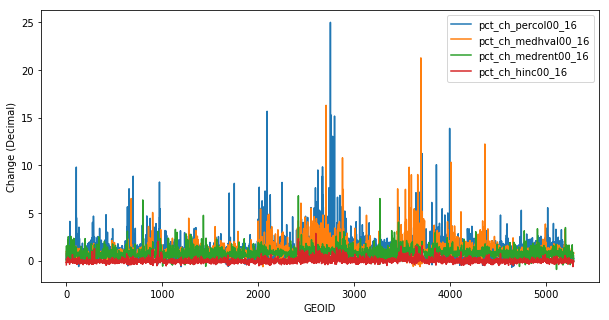

In [51]:
for newTyps_val in newTyps_values:
    print(newTyps_val,Typ_ALL_Incomes[newTyps].std())
    Typ_ALL_Incomes[Typ_ALL_Incomes.GEOID!=36061025100][newTyps_val].plot(legend=True, figsize=(10,5))
    plt.xlabel('GEOID')
    plt.ylabel('Change (Decimal)')


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


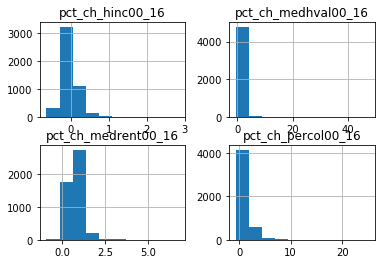

Distribution for Lower Income Census Tracts


In [52]:
# Explore 
newTyps_values = ['pct_ch_percol00_16','pct_ch_medhval00_16','pct_ch_medrent00_16','pct_ch_hinc00_16']
plt.figure(1)
Typ_ALL_Incomes.loc[:,newTyps_values].hist(ax=plt.gca(), figsize = (20,5))
plt.show()
print('Distribution for Lower Income Census Tracts')


In [53]:
Typ_ALL_Incomes = Typ_ALL_Incomes.loc[:,newTyps+['GEOID']]
Typ_ALL_Incomes.head()


,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary,GEOID
0,0.0,0.0,0.0,0.0,9.001010e+09
1,0.0,0.0,0.0,0.0,9.001010e+09
2,0.0,0.0,1.0,0.0,9.001010e+09
3,0.0,0.0,0.0,0.0,9.001010e+09
4,0.0,0.0,0.0,0.0,9.001010e+09


In [54]:

print(Typ_ALL_Incomes.shape)
print(Typ_Bin.shape)
Typ_Bin_ALL_Incomes = Typ_Bin.merge(Typ_ALL_Incomes, on='GEOID',how='outer')
print(Typ_Bin_ALL_Incomes.shape)

(4829, 5)
(4829, 19)
(4829, 23)


In [55]:
Typ_Bin_ALL_Incomes.head(4)

,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,...,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_hinc00_16_TEST,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary
0,9.001010e+09,H,1601.0,1510.0,1000001.0,1494000.0,273976.05,150655.0,0.354071,0.619597,...,1.0,0.0,0.749923,0.493999,-0.056839,-0.450116,0.0,0.0,0.0,0.0
1,9.001010e+09,H,1244.0,1628.0,1000000.0,2000000.0,290000.00,250000.0,0.748477,0.784978,...,0.0,0.0,0.048767,1.000000,0.308682,-0.137931,0.0,0.0,0.0,0.0
2,9.001010e+09,H,833.0,2113.0,1000000.0,2000000.0,290000.00,212448.0,0.704225,0.761389,...,0.0,0.0,0.081173,1.000000,1.536615,-0.267421,0.0,0.0,1.0,0.0
3,9.001010e+09,H,1791.0,2250.0,769300.0,1459900.0,157543.95,187875.0,0.342164,0.662879,...,0.0,0.0,0.937313,0.897699,0.256281,0.192524,0.0,0.0,0.0,0.0


In [56]:

# Typ_Bin_ALL_Incomes.replace(nan,0, inplace=True)
print(Typ_Bin_ALL_Incomes.isnull().sum())
Typ_Bin_ALL_Incomes.tail()

GEOID                         0
High_low                      0
medrent00                     0
medrent16                     0
medhval00                     0
medhval16                     0
hinc00                        0
hinc16                        0
percol00                      0
percol16                      0
pct_ch_hinc00_16              0
gent00_16                     0
gent90_00                     0
Supergent16                   0
Ongoing_adv_gent              0
pct_ch_percol00_16            0
pct_ch_medhval00_16           0
pct_ch_medrent00_16           0
pct_ch_hinc00_16_TEST         0
pct_ch_percol00_16_binary     0
pct_ch_medhval00_16_binary    0
pct_ch_medrent00_16_binary    0
pct_ch_hinc00_16_binary       0
dtype: int64


,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,...,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_hinc00_16_TEST,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary
4824,3.611901e+10,H,1645.999961,2492.0,259399.9935,443400.0,104085.3539,87746.0,0.531846,0.542408,...,0.0,0.0,0.019859,0.709329,0.513973,-0.156980,0.0,0.0,0.0,0.0
4825,3.611901e+10,H,1368.000000,1417.0,219600.0000,395500.0,124981.3000,110610.0,0.417178,0.458103,...,0.0,0.0,0.098099,0.801002,0.035819,-0.114988,0.0,0.0,0.0,0.0
4826,3.611901e+10,H,1875.000000,1615.0,341999.9883,614400.0,165790.0965,138571.0,0.598964,0.520121,...,0.0,0.0,-0.131633,0.796491,-0.138667,-0.164178,0.0,0.0,0.0,0.0
4827,3.611901e+10,H,1645.999934,2194.0,259399.9949,432600.0,104085.3478,104286.0,0.531846,0.680927,...,0.0,0.0,0.280309,0.667695,0.332928,0.001928,0.0,0.0,0.0,0.0
4828,3.611902e+10,H,1150.000000,1705.0,319700.0000,584300.0,145406.0000,126724.0,0.485083,0.600913,...,0.0,0.0,0.238783,0.827651,0.482609,-0.128482,0.0,0.0,0.0,0.0


# Filter low incomes

In [57]:
Typ_Low_Incomes = Typ_Bin.loc[Typ_Bin['High_low'] == 'L'].copy()
print(Typ_Low_Incomes.shape)
Typ_Low_Incomes.tail()

(1562, 19)


,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_hinc00_16_TEST
5255,3.611901e+10,L,791.000000,1558.0,175200.0000,352500.0,44168.45000,46917.0,0.155505,0.205989,0.062229,0.0,1.0,0.0,1.0,0.324645,1.011986,0.969659,0.062229
5264,3.611901e+10,L,830.000000,1369.0,168900.0000,318900.0,60405.55000,46884.0,0.168866,0.296474,-0.223846,0.0,0.0,0.0,0.0,0.755675,0.888099,0.649398,-0.223846
5265,3.611901e+10,L,795.003049,1433.0,155806.9129,300300.0,70887.26429,53854.0,0.221004,0.251836,-0.240287,0.0,0.0,0.0,0.0,0.139508,0.927386,0.802509,-0.240287
5266,3.611901e+10,L,740.000000,1167.0,128600.0000,290500.0,34495.50000,35813.0,0.112580,0.104022,0.038193,0.0,0.0,0.0,0.0,-0.076020,1.258942,0.577027,0.038193
5281,3.611901e+10,L,906.000024,1651.0,228500.0059,256300.0,105238.10270,38323.0,0.369576,0.226161,-0.635845,0.0,0.0,0.0,0.0,-0.388053,0.121663,0.822296,-0.635845


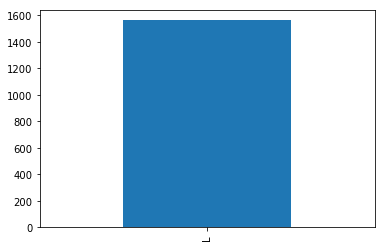

In [58]:
Typ_Low_Incomes['High_low'].value_counts().plot(kind='bar')

In [59]:
newTyps_raw = []
for string in newTyps_values:
    newTyps_raw.append(string[:-5])

In [60]:
std_co = 1

for raw in newTyps_raw:
    #
    Typ_Low_Incomes[raw+'00_16_binary'] = (Typ_Low_Incomes[raw+'00_16']> Typ_Low_Incomes[raw+'00_16'].mean()+std_co*Typ_Low_Incomes[raw+'00_16'].std())
    print(raw+'---------------------------------------------------------------------')
    print('Mean:'+str(round(Typ_Low_Incomes[raw+'00_16'].mean(),2)))
    print('std:'+str(round(Typ_Low_Incomes[raw+'00_16'].std(),2)))
    print('mean+'+str(std_co)+'*std:'+str(round(Typ_Low_Incomes[raw+'00_16'].mean()+std_co*Typ_Low_Incomes[raw+'00_16'].std(),2)))
    Typ_Low_Incomes[raw+'00_16_binary'].replace(False,0, inplace=True)
    Typ_Low_Incomes[raw+'00_16_binary'].replace(True,1, inplace=True)
    Typ_Low_Incomes[raw+'00_16_binary']  = pd.to_numeric(Typ_Low_Incomes[raw+'00_16_binary'])

pct_ch_percol---------------------------------------------------------------------
Mean:1.44
std:1.72
mean+1*std:3.16
pct_ch_medhval---------------------------------------------------------------------
Mean:1.3
std:1.51
mean+1*std:2.81
pct_ch_medrent---------------------------------------------------------------------
Mean:0.75
std:0.29
mean+1*std:1.04
pct_ch_hinc---------------------------------------------------------------------
Mean:-0.09
std:0.23
mean+1*std:0.15


In [61]:
newTyps = ['pct_ch_percol00_16_binary','pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_hinc00_16_binary']
Typ_Low_Incomes.loc[:,newTyps].sum()

pct_ch_percol00_16_binary     144.0
pct_ch_medhval00_16_binary     73.0
pct_ch_medrent00_16_binary    183.0
pct_ch_hinc00_16_binary       226.0
dtype: float64

In [62]:
newTyps_values

['pct_ch_percol00_16',
 'pct_ch_medhval00_16',
 'pct_ch_medrent00_16',
 'pct_ch_hinc00_16']

pct_ch_percol00_16 pct_ch_percol00_16_binary     0.289386
pct_ch_medhval00_16_binary    0.211138
pct_ch_medrent00_16_binary    0.321711
pct_ch_hinc00_16_binary       0.351897
dtype: float64
pct_ch_medhval00_16 pct_ch_percol00_16_binary     0.289386
pct_ch_medhval00_16_binary    0.211138
pct_ch_medrent00_16_binary    0.321711
pct_ch_hinc00_16_binary       0.351897
dtype: float64
pct_ch_medrent00_16 pct_ch_percol00_16_binary     0.289386
pct_ch_medhval00_16_binary    0.211138
pct_ch_medrent00_16_binary    0.321711
pct_ch_hinc00_16_binary       0.351897
dtype: float64
pct_ch_hinc00_16 pct_ch_percol00_16_binary     0.289386
pct_ch_medhval00_16_binary    0.211138
pct_ch_medrent00_16_binary    0.321711
pct_ch_hinc00_16_binary       0.351897
dtype: float64


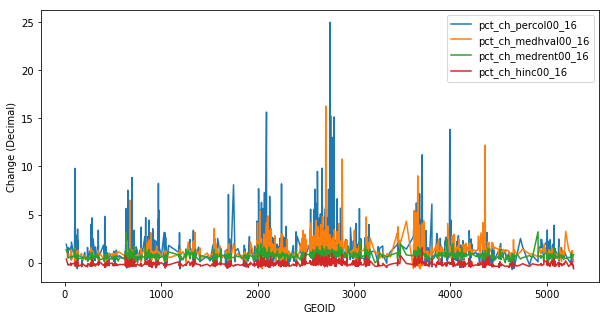

In [63]:
for newTyps_val in newTyps_values:
    print(newTyps_val,Typ_Low_Incomes[newTyps].std())
    Typ_Low_Incomes[Typ_Low_Incomes.GEOID!=36061025100][newTyps_val].plot(legend=True, figsize=(10,5))
    plt.xlabel('GEOID')
    plt.ylabel('Change (Decimal)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


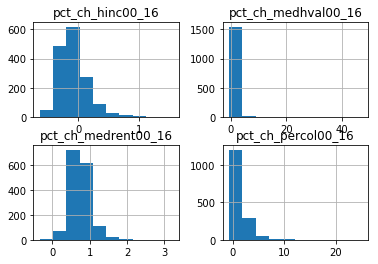

Distribution for Lower Income Census Tracts


In [64]:
# Explore 
newTyps_values = ['pct_ch_percol00_16','pct_ch_medhval00_16','pct_ch_medrent00_16','pct_ch_hinc00_16']
plt.figure(1)
Typ_Low_Incomes.loc[:,newTyps_values].hist(ax=plt.gca(), figsize = (20,5))
plt.show()
print('Distribution for Lower Income Census Tracts')

In [65]:
Typ_Low_Incomes = Typ_Low_Incomes.loc[:,newTyps+['GEOID']]
Typ_Low_Incomes.head()

,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary,GEOID
15,0.0,0.0,1.0,1.0,9.001020e+09
28,0.0,0.0,0.0,0.0,9.001021e+09
29,0.0,0.0,0.0,0.0,9.001022e+09
33,0.0,0.0,0.0,0.0,9.001022e+09
35,0.0,0.0,0.0,0.0,9.001022e+09


In [66]:
# Typ_Bin.pct_ch_percol00_16

In [67]:
print(Typ_Low_Incomes.shape)
print(Typ_Bin.shape)
Typ_Bin_GENTLOWONLY = Typ_Bin.merge(Typ_Low_Incomes, on='GEOID',how='outer')
print(Typ_Bin_GENTLOWONLY.shape)
Typ_Bin_GENTLOWONLY.replace(nan,0, inplace=True)
Typ_Bin_GENTLOWONLY.tail()

(1562, 5)
(4829, 19)
(4829, 23)


,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,...,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_hinc00_16_TEST,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary
4824,3.611901e+10,H,1645.999961,2492.0,259399.9935,443400.0,104085.3539,87746.0,0.531846,0.542408,...,0.0,0.0,0.019859,0.709329,0.513973,-0.156980,0.0,0.0,0.0,0.0
4825,3.611901e+10,H,1368.000000,1417.0,219600.0000,395500.0,124981.3000,110610.0,0.417178,0.458103,...,0.0,0.0,0.098099,0.801002,0.035819,-0.114988,0.0,0.0,0.0,0.0
4826,3.611901e+10,H,1875.000000,1615.0,341999.9883,614400.0,165790.0965,138571.0,0.598964,0.520121,...,0.0,0.0,-0.131633,0.796491,-0.138667,-0.164178,0.0,0.0,0.0,0.0
4827,3.611901e+10,H,1645.999934,2194.0,259399.9949,432600.0,104085.3478,104286.0,0.531846,0.680927,...,0.0,0.0,0.280309,0.667695,0.332928,0.001928,0.0,0.0,0.0,0.0
4828,3.611902e+10,H,1150.000000,1705.0,319700.0000,584300.0,145406.0000,126724.0,0.485083,0.600913,...,0.0,0.0,0.238783,0.827651,0.482609,-0.128482,0.0,0.0,0.0,0.0


# Visualize ALL

In [78]:
# Typ_ALL_Incomes



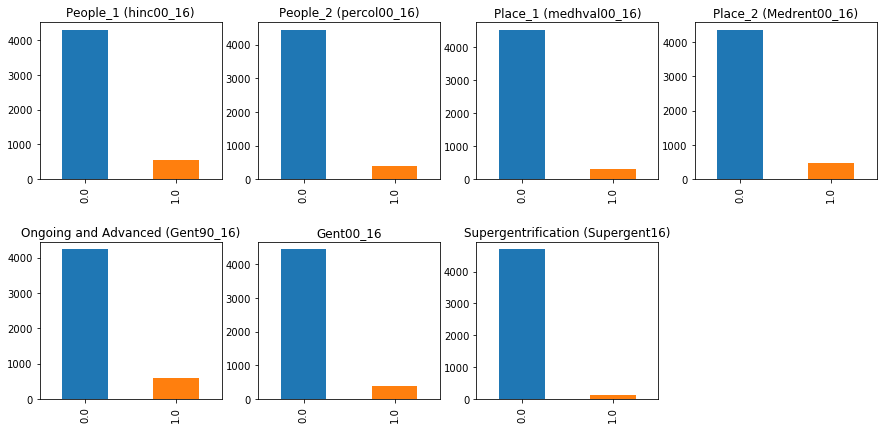

In [79]:
# For all:
titles = ['People_1 (hinc00_16)','People_2 (percol00_16)',
          'Place_1 (medhval00_16)','Place_2 (Medrent00_16)',
          'Ongoing and Advanced (Gent90_16)',
            'Gent00_16','Supergentrification (Supergent16)']
bin_typs = ['pct_ch_hinc00_16_binary','pct_ch_percol00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary',
            'Ongoing_adv_gent',
            'gent00_16','Supergent16']

for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Typ_Bin_ALL_Incomes[column].value_counts().plot(kind='bar', figsize = (15,15), title=titles[i])
    Typ_Bin_ALL_Incomes[column].value_counts()/Typ_Bin_ALL_Incomes[column].value_counts().sum()
    plt.subplots_adjust(hspace=0.4)

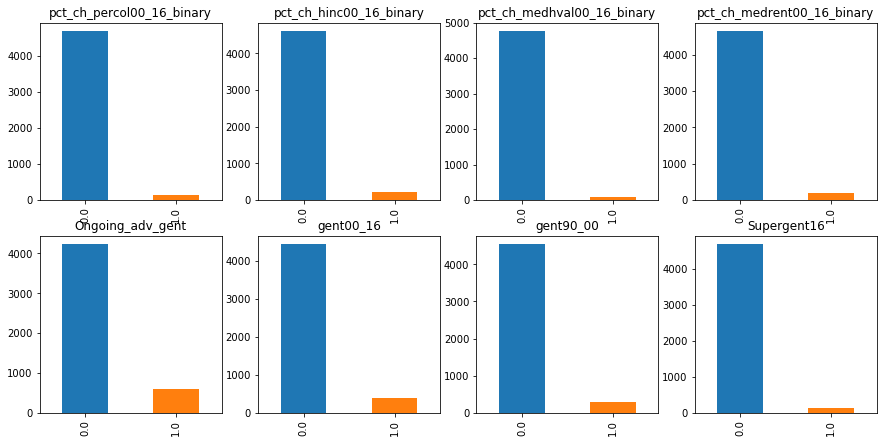

In [158]:
#Typ_Bin_GENTLOWONLY
bin_typs = ['pct_ch_percol00_16_binary','pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Typ_Bin_GENTLOWONLY[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Typ_Bin_GENTLOWONLY[column].value_counts()/Typ_Bin_GENTLOWONLY[column].value_counts().sum()

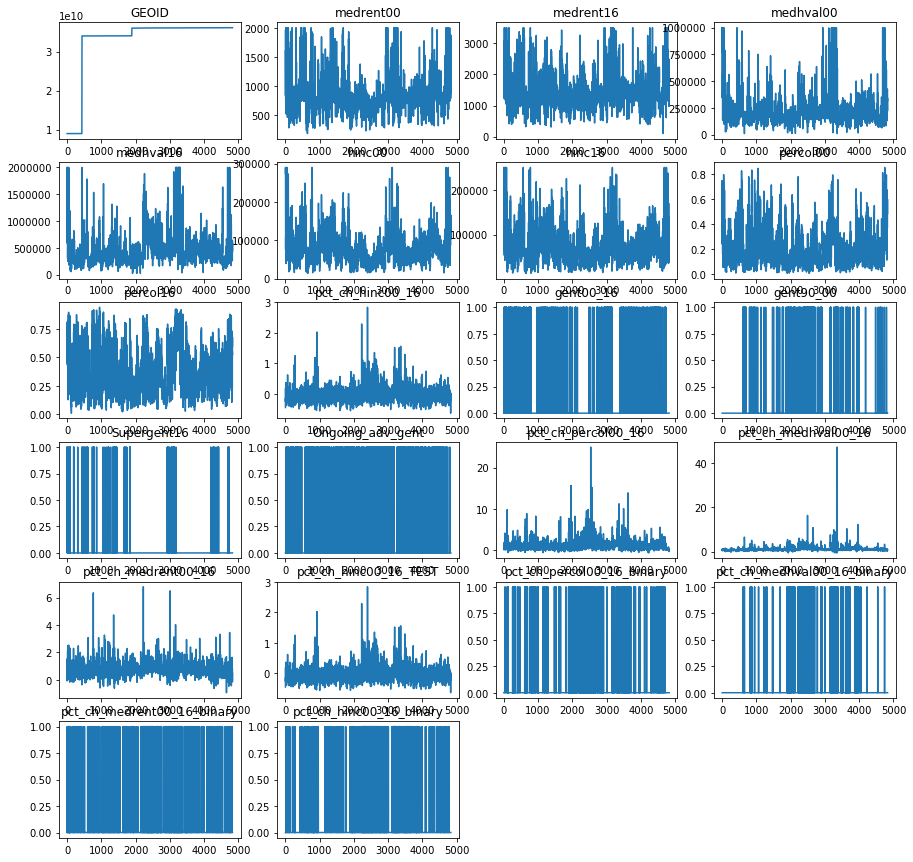

In [159]:
# For all:
# Typ_Bin_new.columns
for i, column in enumerate(Typ_Bin_ALL_Incomes.drop('High_low',axis=1).columns):
    plt.figure(1)
    plt.subplot(6,4,i+1)
    Typ_Bin_ALL_Incomes[column].plot(figsize = (15,15), title=column)

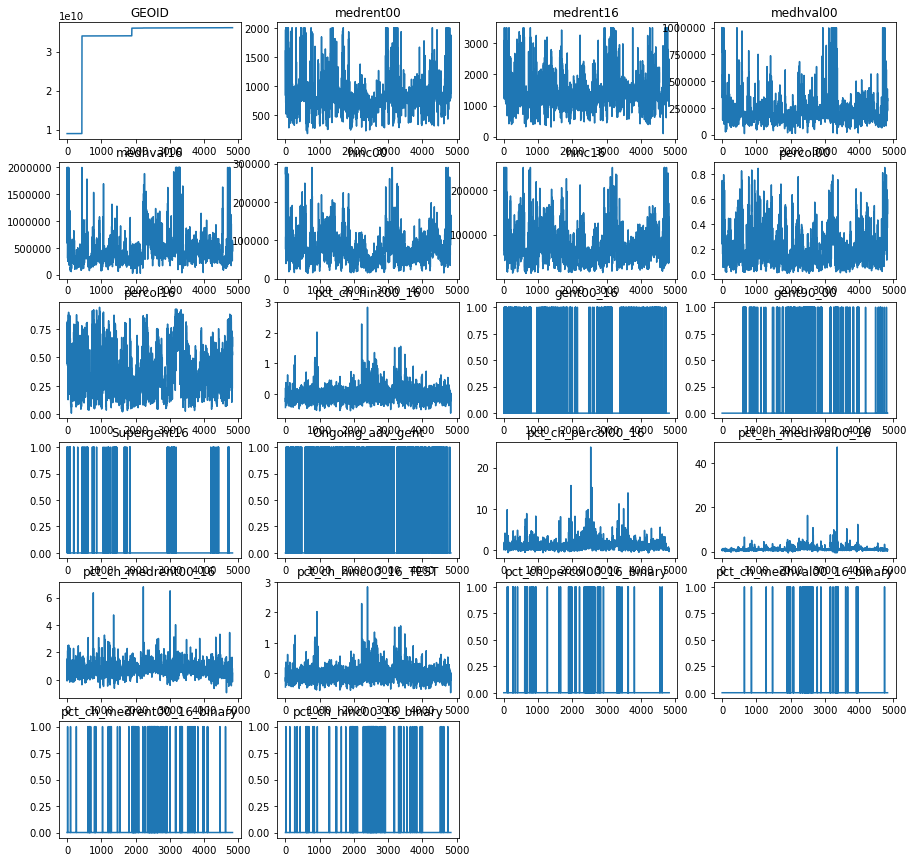

In [160]:
#Typ_Bin_GENTLOWONLY
for i, column in enumerate(Typ_Bin_GENTLOWONLY.drop('High_low',axis=1).columns):
    plt.figure(1)
    plt.subplot(6,4,i+1)
    Typ_Bin_GENTLOWONLY[column].plot(figsize = (15,15), title=column)

In [161]:
# print(column)
# Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]]

(1-Typ_Bin_ALL_Incomes.medrent16.isnull()).sum(), Typ_Bin_ALL_Incomes.shape

(4829, (4829, 23))

In [162]:
matches = pd.DataFrame()
matches_percentage = pd.DataFrame()
matches_positives = pd.DataFrame()

for i, column_1 in enumerate(bin_typs):
    for k, column_2 in enumerate(bin_typs):
        if i > k:
             continue
        matches_percentage.loc[column_1,column_2]  = \
            Typ_Bin_ALL_Incomes[Typ_Bin_ALL_Incomes[column_1] == Typ_Bin_ALL_Incomes[column_2]][column_1].count()/(len(Typ_Bin_ALL_Incomes[column_1]))
        matches.loc[column_1,column_2] = Typ_Bin_ALL_Incomes[Typ_Bin_ALL_Incomes[column_1] == Typ_Bin_ALL_Incomes[column_2]][column_1].count()
        matches_positives.loc[column_1,column_2] = Typ_Bin_ALL_Incomes[Typ_Bin_ALL_Incomes[column_1] == Typ_Bin_ALL_Incomes[column_2]][column_1].sum()
#         print(column_1+'=='+column_2+\
#               '\t'+str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())+' times'+\
#              'out of '+str(len(Typ_Bin[column_1]))+'\t'\
#               +str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count()/(len(Typ_Bin[column_1]))))
        
matches_percentage

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,1.0,0.875544,0.897080,0.860220,0.841996,0.848623,0.898116,0.890868
pct_ch_hinc00_16_binary,NaN,1.000000,0.885691,0.869124,0.811555,0.827708,0.862704,0.864568
pct_ch_medhval00_16_binary,NaN,NaN,1.000000,0.876993,0.842203,0.858770,0.906606,0.910126
pct_ch_medrent00_16_binary,NaN,NaN,NaN,1.000000,0.822738,0.849658,0.869331,0.885276
Ongoing_adv_gent,NaN,NaN,NaN,NaN,1.000000,0.927521,0.934769,0.849244
gent00_16,NaN,NaN,NaN,NaN,NaN,1.000000,0.864775,0.921723
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.914475
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [163]:
matches_positives

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,393.0,166.0,99.0,97.0,112.0,22.0,91.0,0.0
pct_ch_hinc00_16_binary,NaN,540.0,145.0,192.0,112.0,45.0,79.0,10.0
pct_ch_medhval00_16_binary,NaN,NaN,302.0,92.0,67.0,1.0,66.0,1.0
pct_ch_medrent00_16_binary,NaN,NaN,NaN,476.0,107.0,66.0,63.0,28.0
Ongoing_adv_gent,NaN,NaN,NaN,NaN,594.0,313.0,280.0,0.0
gent00_16,NaN,NaN,NaN,NaN,NaN,382.0,5.0,69.0
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,281.0,1.0
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0


In [164]:
matches

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,4829.0,4228.0,4332.0,4154.0,4066.0,4098.0,4337.0,4302.0
pct_ch_hinc00_16_binary,NaN,4829.0,4277.0,4197.0,3919.0,3997.0,4166.0,4175.0
pct_ch_medhval00_16_binary,NaN,NaN,4829.0,4235.0,4067.0,4147.0,4378.0,4395.0
pct_ch_medrent00_16_binary,NaN,NaN,NaN,4829.0,3973.0,4103.0,4198.0,4275.0
Ongoing_adv_gent,NaN,NaN,NaN,NaN,4829.0,4479.0,4514.0,4101.0
gent00_16,NaN,NaN,NaN,NaN,NaN,4829.0,4176.0,4451.0
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,4829.0,4416.0
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4829.0


In [165]:
matches = pd.DataFrame()
matches_percentage = pd.DataFrame()
matches_positives = pd.DataFrame()

for i, column_1 in enumerate(bin_typs):
    for k, column_2 in enumerate(bin_typs):
        if i > k:
             continue
        matches_percentage.loc[column_1,column_2]  = \
            Typ_Bin_GENTLOWONLY[Typ_Bin_GENTLOWONLY[column_1] == Typ_Bin_GENTLOWONLY[column_2]][column_1].count()/(len(Typ_Bin_GENTLOWONLY[column_1]))
        matches.loc[column_1,column_2] = Typ_Bin_GENTLOWONLY[Typ_Bin_GENTLOWONLY[column_1] == Typ_Bin_GENTLOWONLY[column_2]][column_1].count()
        matches_positives.loc[column_1,column_2] = Typ_Bin_GENTLOWONLY[Typ_Bin_GENTLOWONLY[column_1] == Typ_Bin_GENTLOWONLY[column_2]][column_1].sum()
#         print(column_1+'=='+column_2+\
#               '\t'+str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())+' times'+\
#              'out of '+str(len(Typ_Bin[column_1]))+'\t'\
#               +str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count()/(len(Typ_Bin[column_1]))))
        
matches_percentage

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,1.0,0.953199,0.962932,0.955063,0.866639,0.893974,0.928971,0.942431
pct_ch_hinc00_16_binary,NaN,1.000000,0.949265,0.953407,0.856285,0.879064,0.916546,0.925450
pct_ch_medhval00_16_binary,NaN,NaN,1.000000,0.956927,0.870159,0.906192,0.934562,0.957134
pct_ch_medrent00_16_binary,NaN,NaN,NaN,1.000000,0.863119,0.884655,0.927107,0.934355
Ongoing_adv_gent,NaN,NaN,NaN,NaN,1.000000,0.927521,0.934769,0.849244
gent00_16,NaN,NaN,NaN,NaN,NaN,1.000000,0.864775,0.921723
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.914475
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [166]:
matches_positives

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,144.0,72.0,19.0,55.0,47.0,7.0,41.0,0.0
pct_ch_hinc00_16_binary,NaN,226.0,27.0,92.0,63.0,12.0,52.0,0.0
pct_ch_medhval00_16_binary,NaN,NaN,73.0,24.0,20.0,1.0,19.0,0.0
pct_ch_medrent00_16_binary,NaN,NaN,NaN,183.0,58.0,4.0,56.0,0.0
Ongoing_adv_gent,NaN,NaN,NaN,NaN,594.0,313.0,280.0,0.0
gent00_16,NaN,NaN,NaN,NaN,NaN,382.0,5.0,69.0
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,281.0,1.0
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0


In [167]:
matches

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,4829.0,4603.0,4650.0,4612.0,4185.0,4317.0,4486.0,4551.0
pct_ch_hinc00_16_binary,NaN,4829.0,4584.0,4604.0,4135.0,4245.0,4426.0,4469.0
pct_ch_medhval00_16_binary,NaN,NaN,4829.0,4621.0,4202.0,4376.0,4513.0,4622.0
pct_ch_medrent00_16_binary,NaN,NaN,NaN,4829.0,4168.0,4272.0,4477.0,4512.0
Ongoing_adv_gent,NaN,NaN,NaN,NaN,4829.0,4479.0,4514.0,4101.0
gent00_16,NaN,NaN,NaN,NaN,NaN,4829.0,4176.0,4451.0
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,4829.0,4416.0
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4829.0


In [168]:
merged_ALL = NYCzip.merge(Typ_Bin_ALL_Incomes,on='GEOID')
list(merged_ALL.columns)
print(type(merged_ALL),merged_ALL.shape)
mergedgpd_ALL = gpd.GeoDataFrame(merged_ALL)
mergedgpd_ALL.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (4829, 24)


(4829, 24)

In [169]:
merged_LOWONLY = NYCzip.merge(Typ_Bin_GENTLOWONLY,on='GEOID')
list(merged_LOWONLY.columns)
print(type(merged_LOWONLY),merged_LOWONLY.shape)
mergedgpd_LOWONLY = gpd.GeoDataFrame(merged_LOWONLY)
mergedgpd_LOWONLY.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (4829, 24)


(4829, 24)

In [170]:
mergedgpd_ALL.head(2)

,GEOID,geometry,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,...,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_hinc00_16_TEST,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary
0,34013021601,"POLYGON ((-74.3228040001045 40.90883400018899,...",H,988.0,1854.0,273900.0,472100.0,120523.9989,100977.0,0.231504,...,0.0,0.0,0.600676,0.723622,0.876518,-0.162183,0.0,0.0,0.0,0.0
1,34003031100,POLYGON ((-74.08304199968846 40.78623200040653...,H,808.0,1394.0,192600.0,370700.0,72720.4000,69669.0,0.155385,...,0.0,0.0,1.757281,0.924714,0.725248,-0.041961,0.0,0.0,0.0,0.0


In [171]:
mergedgpd_LOWONLY.head(2)

,GEOID,geometry,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,...,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_hinc00_16_TEST,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary
0,34013021601,"POLYGON ((-74.3228040001045 40.90883400018899,...",H,988.0,1854.0,273900.0,472100.0,120523.9989,100977.0,0.231504,...,0.0,0.0,0.600676,0.723622,0.876518,-0.162183,0.0,0.0,0.0,0.0
1,34003031100,POLYGON ((-74.08304199968846 40.78623200040653...,H,808.0,1394.0,192600.0,370700.0,72720.4000,69669.0,0.155385,...,0.0,0.0,1.757281,0.924714,0.725248,-0.041961,0.0,0.0,0.0,0.0


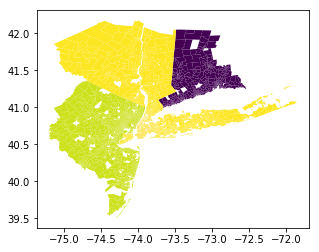

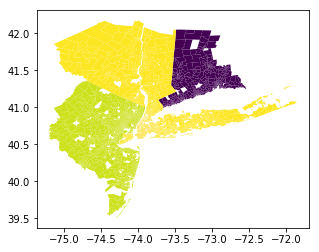

In [172]:
mergedgpd_ALL.plot(column='GEOID')
plt.show()
mergedgpd_LOWONLY.plot(column='GEOID')

In [173]:
cols_typ = bin_typs+ ['GEOID']
output_mergedgpdALL = mergedgpd_ALL.loc[:,cols_typ].copy()
output_mergedgpdLOWONLY = mergedgpd_LOWONLY.loc[:,cols_typ].copy()


In [174]:
output_mergedgpdALL.to_csv('NEW_6_BINARIES_ALL.csv')
output_mergedgpdLOWONLY.to_csv('NEW_6_BINARIES_LOWONLY.csv')

In [175]:
print(output_mergedgpdALL.shape)
output_mergedgpdALL.tail()

(4829, 9)


,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
4824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36061020300
4825,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36061021100
4826,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,36061021200
4827,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,36061022102
4828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36047152200


In [176]:
print(output_mergedgpdLOWONLY.shape)
output_mergedgpdLOWONLY.tail()

(4829, 9)


,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
4824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36061020300
4825,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36061021100
4826,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,36061021200
4827,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36061022102
4828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36047152200


In [177]:
# mergedgpd_ALL.plot(column='pct_ch_hinc00_16_binary')

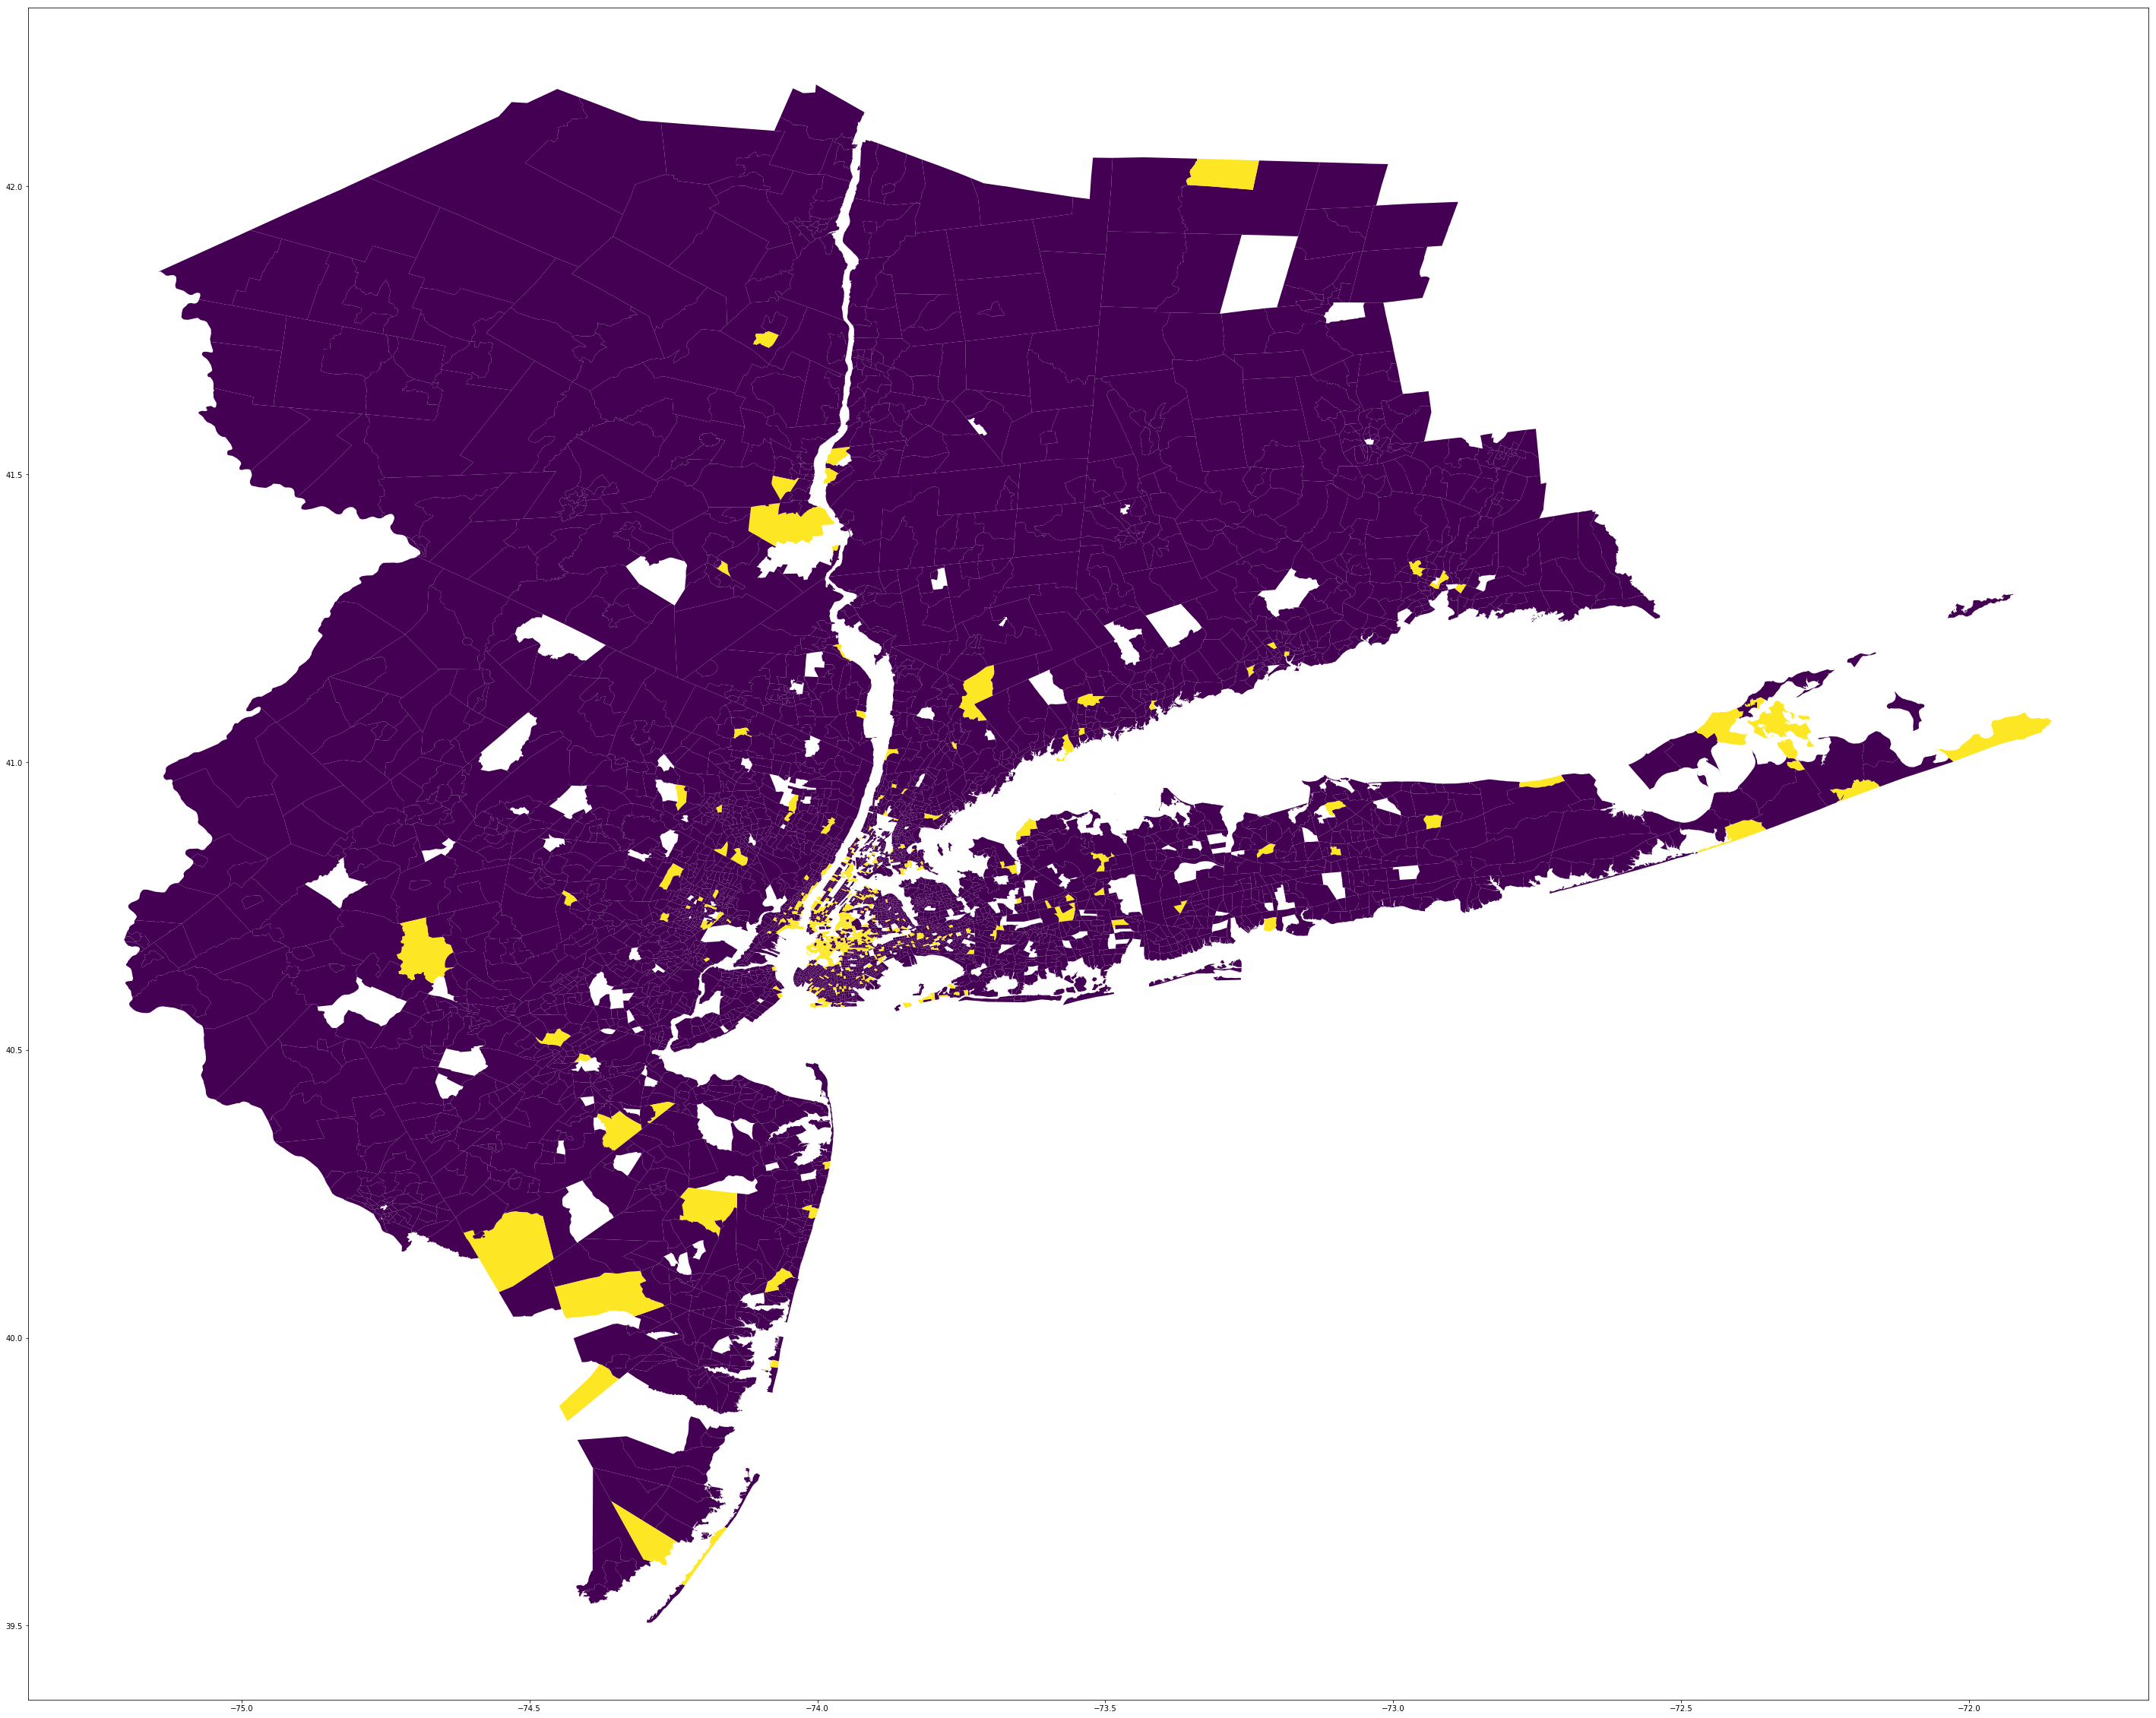

In [178]:
mergedgpd_ALL.plot(column='pct_ch_hinc00_16_binary', figsize=(50,50))

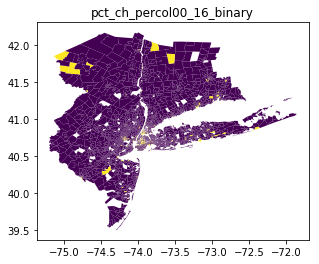

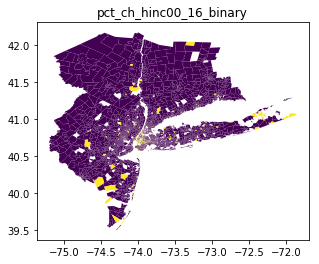

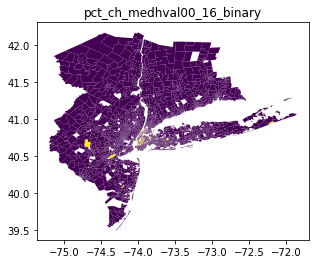

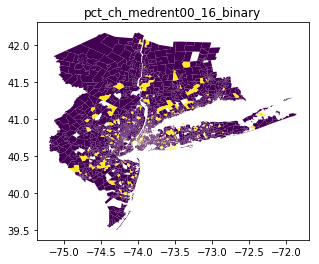

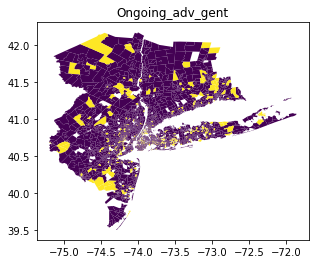

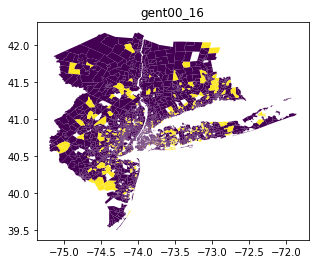

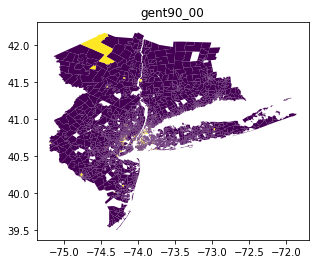

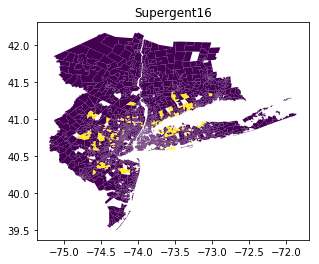

In [179]:
for i, column in enumerate(bin_typs):
    mergedgpd_ALL.plot(column=column)
    plt.title(column)

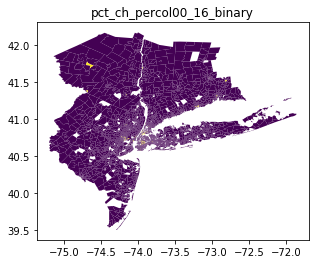

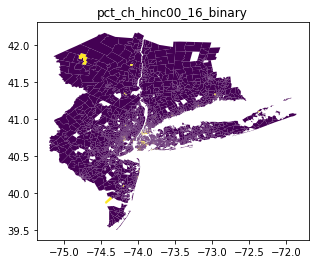

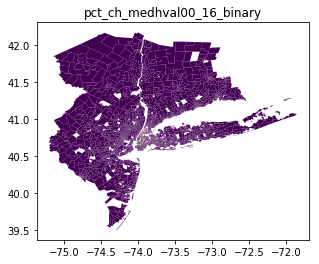

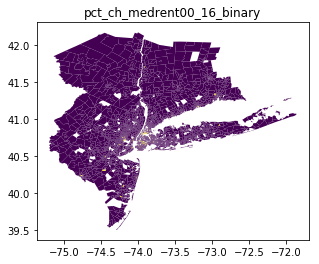

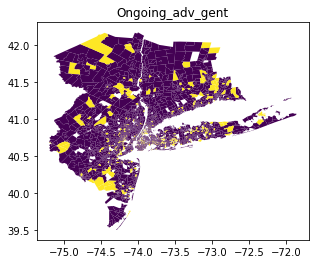

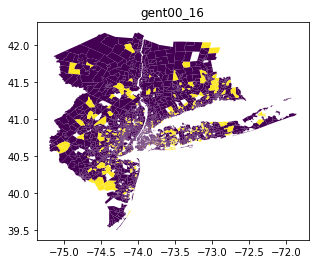

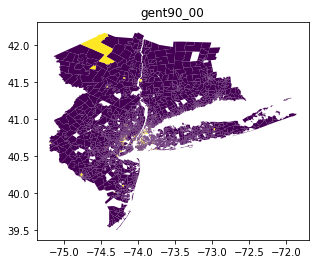

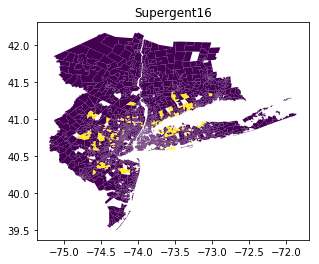

In [180]:
for i, column in enumerate(bin_typs):
    mergedgpd_LOWONLY.plot(column=column)
    plt.title(column)

True getns in pct_ch_percol00_16_binary 393.0
True getns in pct_ch_hinc00_16_binary 540.0
True getns in pct_ch_medhval00_16_binary 302.0
True getns in pct_ch_medrent00_16_binary 476.0
True getns in Ongoing_adv_gent 594.0
True getns in gent00_16 382.0
True getns in gent90_00 281.0
True getns in Supergent16 134.0


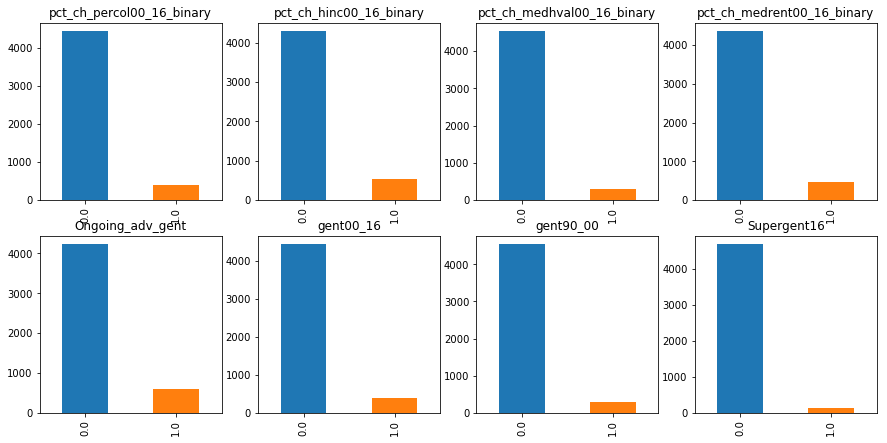

In [184]:
#Typ_Bin_ALL
bin_typs = ['pct_ch_percol00_16_binary','pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    output_mergedgpdALL[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    print('True getns in '+column,output_mergedgpdALL[column].sum())

True getns in pct_ch_percol00_16_binary 144.0
True getns in pct_ch_hinc00_16_binary 226.0
True getns in pct_ch_medhval00_16_binary 73.0
True getns in pct_ch_medrent00_16_binary 183.0
True getns in Ongoing_adv_gent 594.0
True getns in gent00_16 382.0
True getns in gent90_00 281.0
True getns in Supergent16 134.0


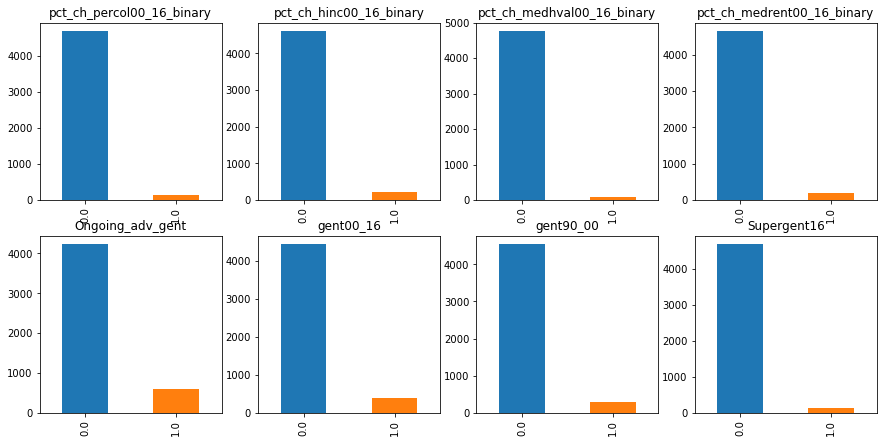

In [185]:
#Typ_Bin_GENTLOWONLY
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    output_mergedgpdLOWONLY[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    print('True getns in '+column,output_mergedgpdLOWONLY[column].sum())

In [ ]:
#END